# Autoencoders
## Gamze Aksu - 171180005

This assignment is about autoencoders, autoencoder types. Within the scope of this assignment, four different autoencoder types were implemented. These are  compression autoencoder, denoising autoencoder,  sparse autoencoder, and  variational autoencoder.

The content of this assignment will be as follows:
1. Preprocessing
2. Explanation of Autoencoders
3. Coding of the Autoencoder
4. Implementation

## Preprocessing

### Installation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Lambda
from keras.models import Model
from keras import backend as K


### Dataset 

The MNIST dataset, which consists of handwritten numbers and a 60,000-example training set and a 10,000-example test set, will be used in the assignment.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Flatten

Since the autoencoder will be created with Denses in the assignment, the images must be flattened. If the autoencoder was created with Convolutional layers, it would not be necessary.

In [3]:
x_train = x_train.reshape(x_train.shape[0],28*28)
x_test  = x_test.reshape(x_test.shape[0],28*28)

### Normalization

Images consist of pixels ranging from 0 to 255. Therefore, the pixel values of the images are divided by 255 and normalization is performed. This values are in between 0 and 1.

In [4]:
x_train = x_train.astype('float32') / 255.0 
x_test  = x_test.astype('float32') / 255.0

### Split

x_train values are divided into x_train and x_val. 80% of the x_train dataset is set to x_train and 20% of the x_train dataset is set to x_val. Since unsupervised learning will be performed, y values are not considered.

In [5]:
x_train, x_val= train_test_split(x_train,test_size = 0.2, random_state=13)

In [6]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('x_val shape:', x_val.shape)

x_train shape: (48000, 784)
x_test shape: (10000, 784)
x_val shape: (12000, 784)


## Explanation of Autoencoders

### Autoencoder 

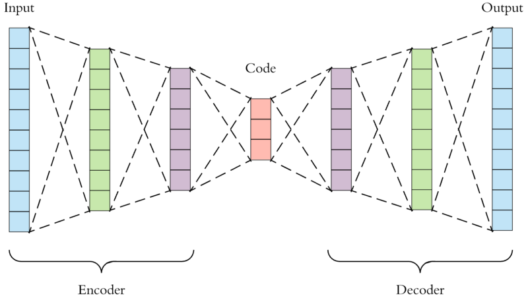 

Autoencoders are unsupervised learning models. They are not trained with labeled data. An autoencoder consists of encoder and decoder parts. These two parts are trained in a single model.The purpose of an autoencoder is to encode important information efficiently.

### Compression Autoencoder

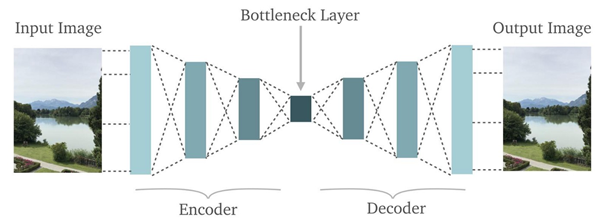

The image given as input in Compression Autoencoder is recreated as output in the same way.

The image given as input in the encoder part is compressed. A smaller sized representation of the input image is created. This small size representation is called code or bottleneck. But it is defined as bottleneck in the assignment.
The decoder takes the bottleneck output as input, that is, the encoder output. It then tries to enlarge it to create the original image. As the model eventually tries to render the first image, the loss becomes equal to the difference between the input and the output. Therefore, MSE is used as the loss function.

While creating the bottleneck, the model may give different results in each training. In addition, it is not known what each value in the bottleneck corresponds to.

Compression autoencoders do lossy compression. Even if loss is tried to be minimized, zero loss does not occur. If a lossless encode and decode operation occurs, it is an overfitting indicator for autoencoders.

### Denoising Autoencoder

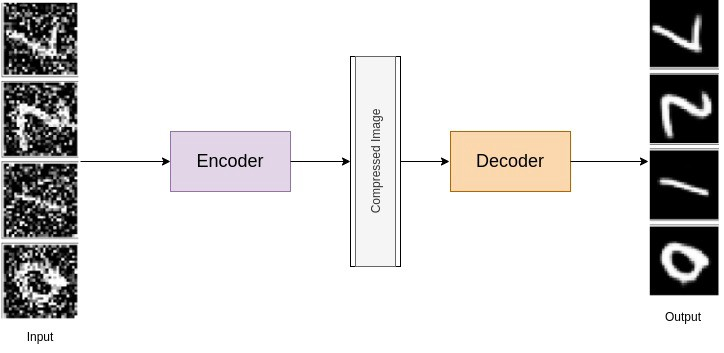

Denoising autoencoders is an extension of standart autoencoders.
Denoising autoencoders are used to generate a noiseless version of the inputs received as noisy.
Noisy images are given as input to denoising autoencoders. Then these noisy images are compressed with the encoder and clean images are obtained at the decoder output.

While training noisy images are given as features, original images are given as labels.

When calculating the loss function, the difference between the noisy images and the original images is calculated. That's why the MSE loss function is used.

### Sparse Autoencoder


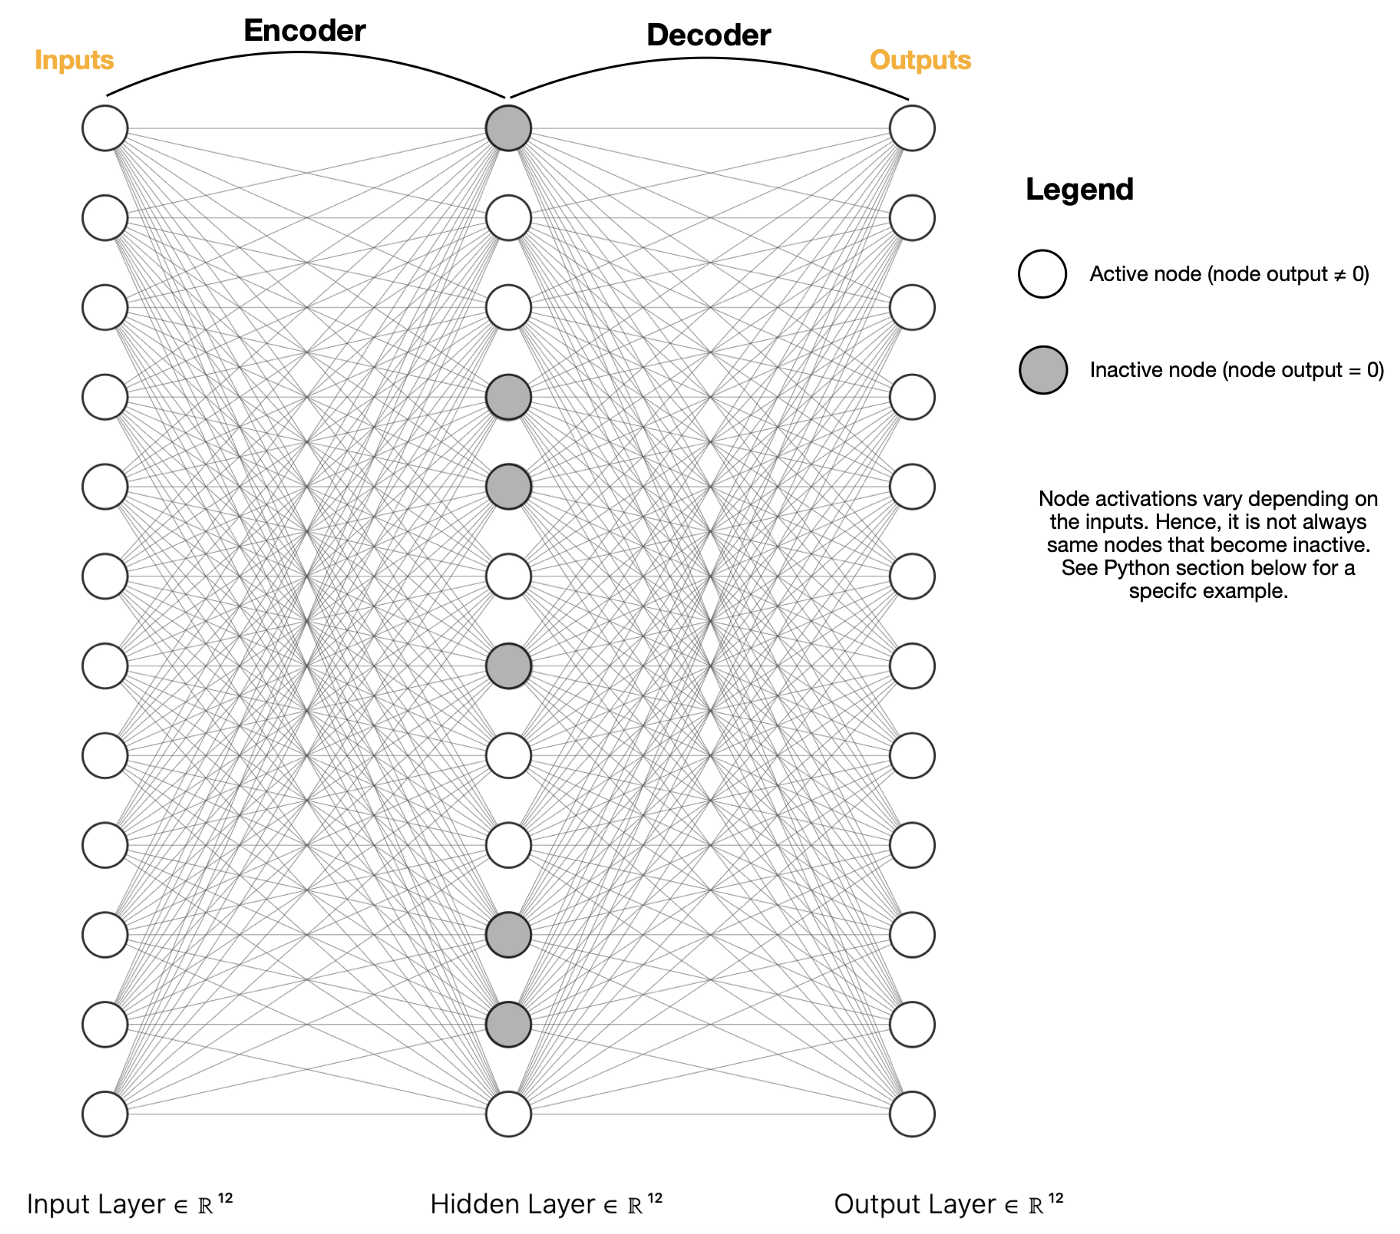

The purpose of an autoencoder is to best encode important informations. For this, an encoder is used and images are compressed into a smaller representation. The decoder tries to create images similar to the original images from these representation images. Sparse autoencoders work just like that and their purpose is the same. But it uses regularisation when creating smaller representations of images, and that creates sparsity. With sparseness, the number of active nodes decreases. The nodes that will be active depend on the inputs and may change in each training.

### Variational Autoenoder


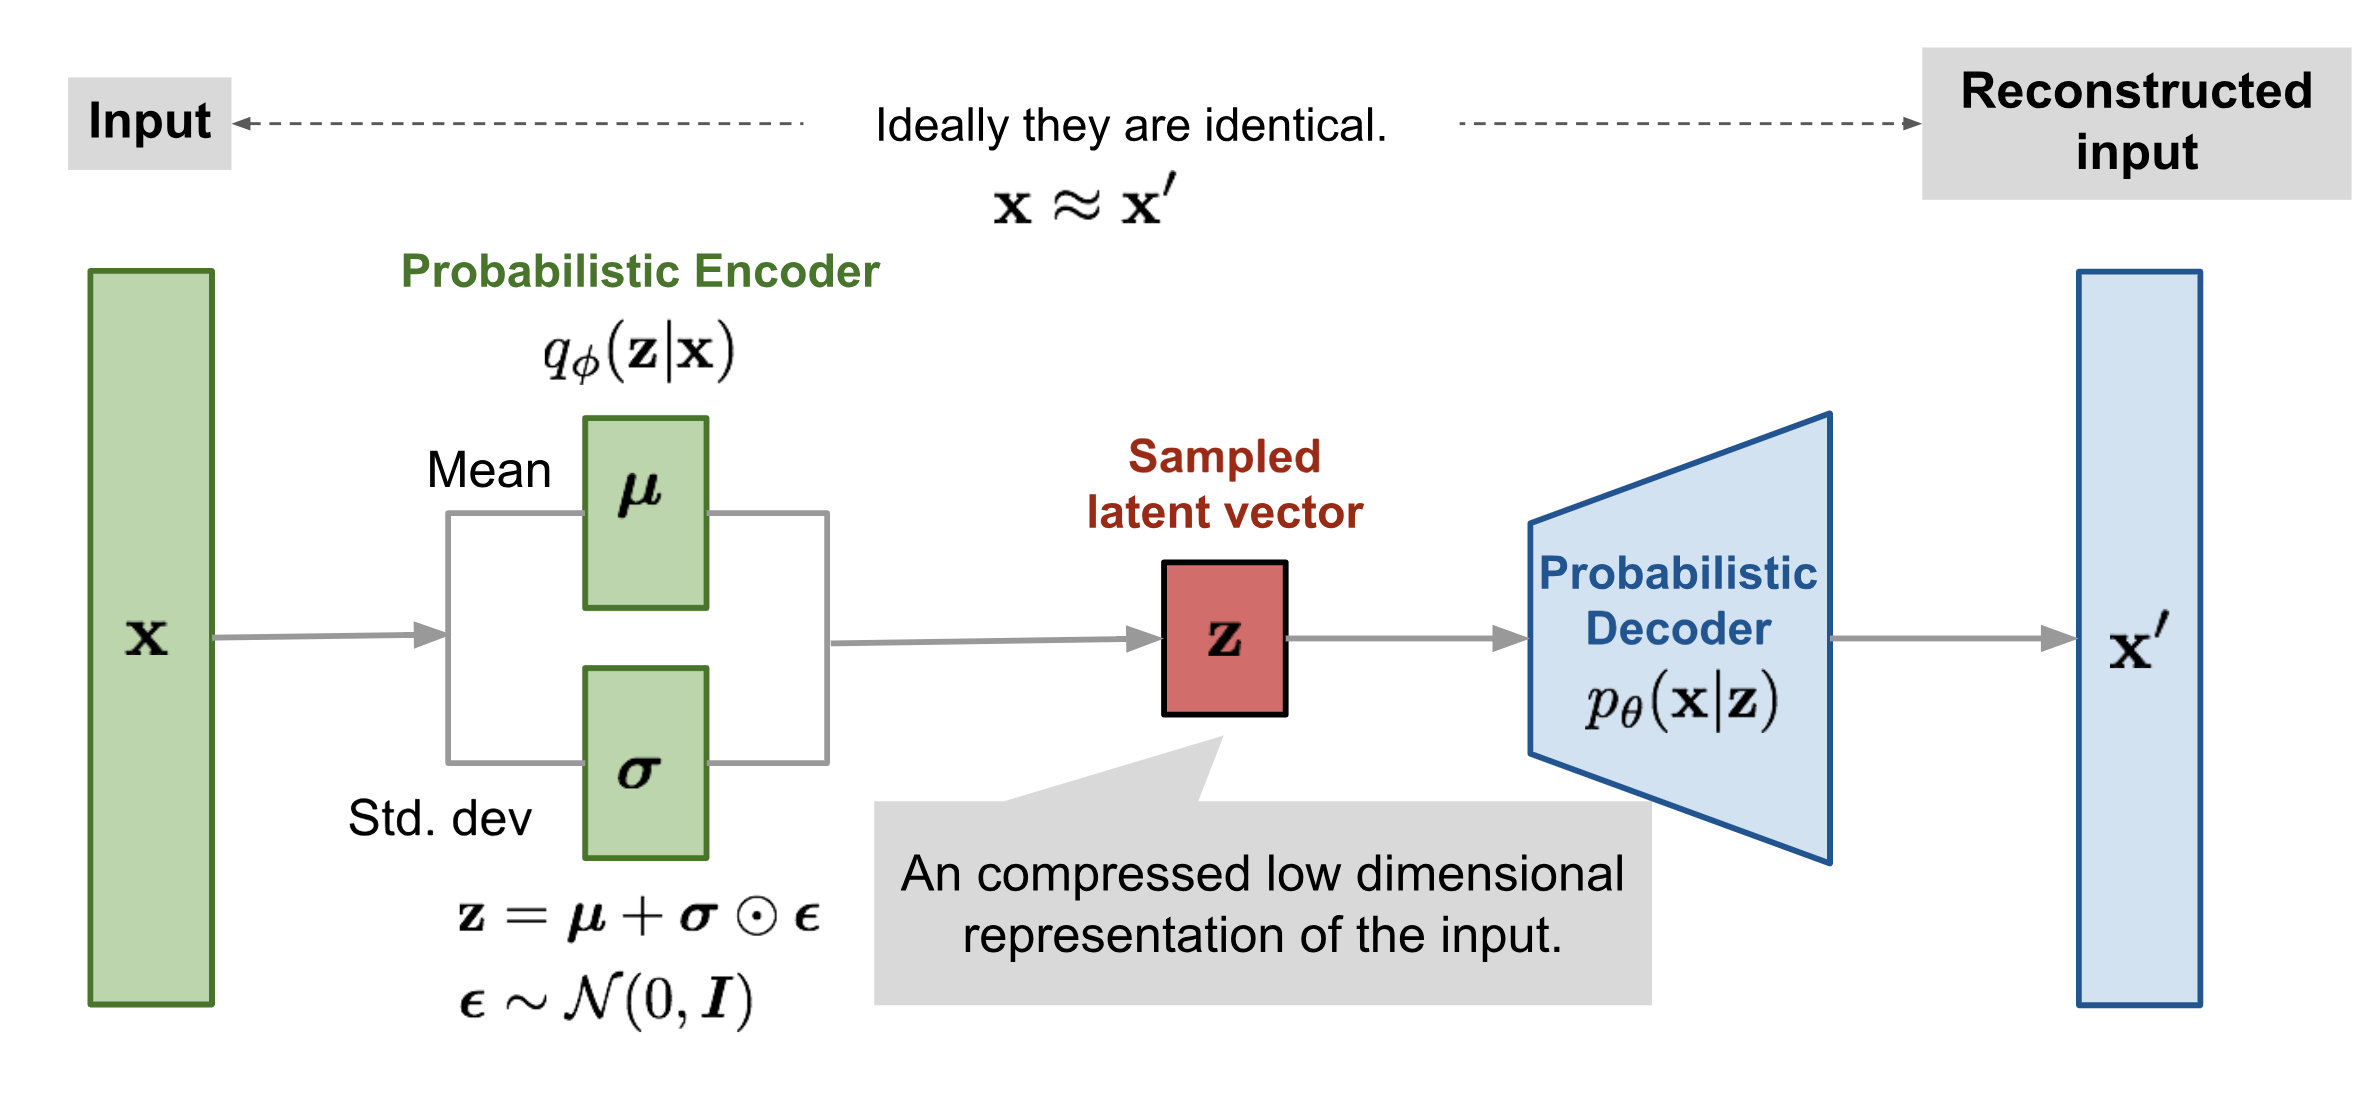

New images cannot be created with compression autoencoders. However, new images can be created with variational autoencoders. Variational autoencoders, like autoencoders, consist of encoders and decoders and try to keep the reconstruction loss to a minimum. In order for the variational autoencoders to create new images, a regularization must be made in the bottleneck part. In this way, overfit is prevented and the latent space created in the bottleneck is made possible to have better properties for a new production.

Variational autoencoders progress as follows.
1. In the encoder part, the input is encoded as a distribution in the hidden space.
2. Then a point is sampled from the hidden space with sampling.
3. The point sampled from the hidden space is then decoded and reconstructed.

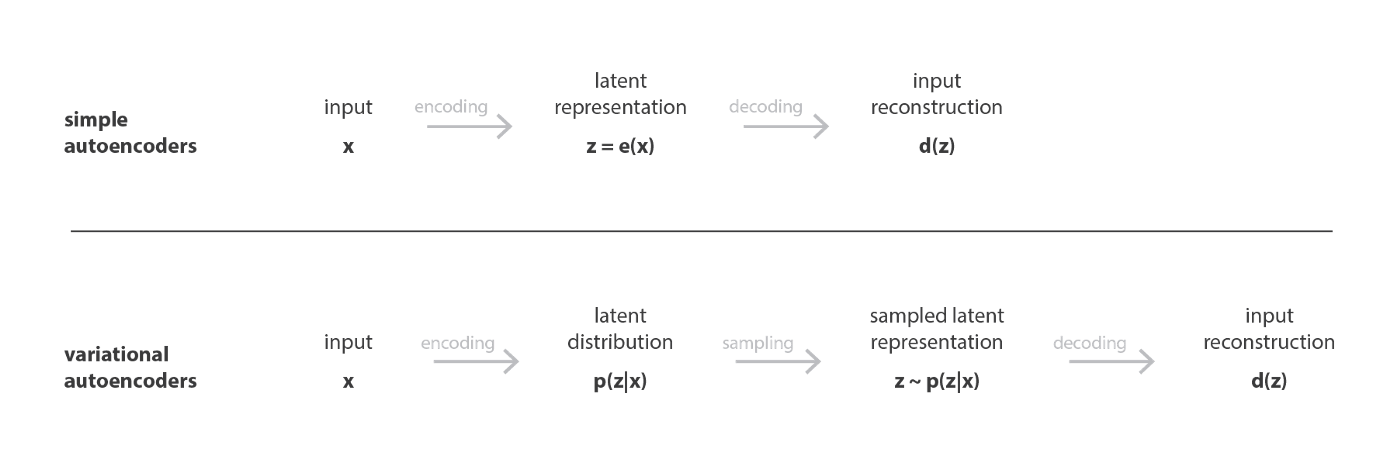

Distributions returned by the encoder are forced to be close to a Normal Distribution (Gaussian Distribution). As a result, the output of the encoder part consists of mean and variance values, not a code. The code is obtained by sampling from these mean and variance values.

A randomly generated epsilon value from the Normal Distribution is required for sampling. To generate the code, the standard deviation times the epsilon are added to the mean. Training is done by keeping the epsilon value constant. This is called the reparametrization trick.

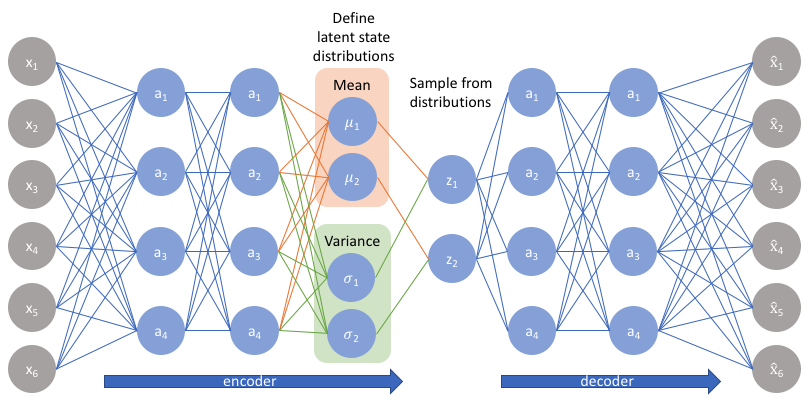

Other autoencoder types have only loss of reconstruction. However, regularization loss aka latent loss is added to the reconstruction loss in this variational autoencoder. The Kullback–Leibler (KL) Divergence is used to calculate the latent loss. In the KL Divergence metric, it is measured how different the two probability distributions are from each other. The loss is calculated by using the KL Divergence metric between the distribution N(µ,σ²) created as a result of the encoder and the normal distribution N(0,1). KL-loss and reconstruction loss are added. Finally, the average of the total loss value is taken.

## Coding of the Autoencoder

In [7]:
class Autoencoder:
    def __init__(self):
        z_mean = None
        z_log_var = None    
    def compression_autoencoder(self, x_train, x_val,epoch = 20):
        """
        Since the images have 28*28 = 784 shapes while coding by Compression Autoencoder, 
        the value in the input layer is determined as 784. Then there is a Dense layer of 
        hidden_encoder 128 units. The sigmoid activation function was used in each layer. 
        Then, the original images consisting of 784 different values were compressed into 32 values 
        in the bottleneck layer. This value is also called the latent dimension. 
        These compressed images are given as input to the hidden_decoder layer. The hidden_decoder 
        layer is the same as the hidden_encoder layer. While the unit numbers decrease from 
        784 to 32 in the encoder part, when the decoder part is passed, the unit numbers increase
        to create the original image. Therefore, there is a Dense layer with 784 units at the output.
        The model is compiled with the mean square error loss function and the Adam optimizer with
        learning rate of 0.01.
        """
        inputs = Input(shape=(784,))                                         #Input Layer
        hidden_encoder = Dense(units=128, activation='sigmoid')(inputs)      #Encoder Layer
        bottleneck = Dense(units=32, activation='sigmoid')(hidden_encoder)   #Bottleneck
        hidden_decoder = Dense(units=128, activation='sigmoid')(bottleneck)  #Decoder Layer
        output = Dense(units=784, activation='sigmoid')(hidden_decoder)      #Output Layer
        
        autoencoder = Model(inputs=inputs, outputs=output)
        
        autoencoder.compile(loss="mse",
                             optimizer=keras.optimizers.Adam(0.01), 
                             metrics=["acc"])
        history = autoencoder.fit(x_train,x_train,
                           batch_size=128,
                           epochs = epoch, 
                           shuffle=True,
                           verbose=1,
                           validation_data = (x_val, x_val))
        
        return history, autoencoder
    def denoising_autoencoder(self, noise_train, noise_val, x_train,x_val,epoch = 20):
        """ 
        Compression autoencoder structure is used precisely in denoising autoencoder. 
        Input values, unit values, activation function used, and loss function used 
        for training are the same as compression autoencoder. Unlike compression autoencoders, 
        noisy images are given as features, and original images are given as labels.
        """
        inputs = Input(shape=(784,)) 
        hidden_encoder = Dense(units=128, activation='sigmoid')(inputs) 
        bottleneck = Dense(units=32, activation='sigmoid')(hidden_encoder) 
        hidden_decoder = Dense(units=128, activation='sigmoid')(bottleneck)
        output = Dense(units=784, activation='sigmoid')(hidden_decoder) 
        
        denoising = Model(inputs=inputs, outputs=output)
        denoising.compile(loss="mse",
                         optimizer=keras.optimizers.Adam(0.01), 
                         metrics=["acc"])
        history = denoising.fit(noise_train, x_train,
                           batch_size=128,
                           epochs = epoch,
                           shuffle=True,
                           verbose=1,
                           validation_data = (noise_val, x_val))
        
        return history, denoising
    def sparse_autoencoder(self, x_train,x_val,epoch = 20):
        """
        Sparse autoencoder structure is the same as compression autoencoder structure. 
        Input values, unit values, activation function used, and loss function used for 
        training are the same as compression autoencoder. The difference from the compression 
        autoencoder is the activity regularizer added to the bottleneck layer. The purpose 
        of adding activity regularizer is neuron activation. L2 regularizer with 0.01 is used 
        as activity regularizer. With the activity regularizer used in the Bottleneck layer, 
        the activation functions in this layer are penalized. Thus, the value of some activation 
        functions becomes zero. Therefore, these nodes become inactive. The values of the nodes 
        that remain active are more important than the others.         
        """
        inputs = Input(shape=(784,)) 
        hidden_encoder = Dense(units=128, activation='sigmoid')(inputs) 
        bottleneck = Dense(units=32, activation='sigmoid', 
                           activity_regularizer=keras.regularizers.L2(0.01))(hidden_encoder) 
        hidden_decoder = Dense(units=128, activation='sigmoid')(bottleneck)
        output = Dense(units=784, activation='sigmoid')(hidden_decoder) 
        
        sae = Model(inputs=inputs, outputs=output)
        sae.compile(loss="mse",
             optimizer=keras.optimizers.Adam(0.01), 
             metrics=["acc"])
        history = sae.fit(x_train,x_train,
                           batch_size=128,
                           epochs = epoch,
                           shuffle=True,
                           verbose=1,
                           validation_data = (x_val, x_val))
        
        return history, sae
    def variational_autoencoder(self,x_train, x_val,epoch = 20):
        """
        Variational autoencoders have a similar structure to compression autoencoder. 
        Input layer, output layer, hidden encoder and hidden decoder are the same as 
        compression autoencoder. Unlike compression autoencoders, variational autoencoders 
        consist of two parts, z_mean and z_log_var, in the bottleneck layer. A Lambda layer 
        is then used. Lambda layer allows arbitrary expressions to be used as layers. It is
        an easy way to customize a layer to perform simple arithmetic operations.
        
        The sampling function we created is given to the function parameter in the lambda 
        layer and the size of the code created in the output shape bottleneck is 32. A point is 
        sampled with the epsilon value created by giving the mean 0 and the standard deviation 1 
        in the sampling function. 

        Binary cross entropy is used as the reconstruction loss function. Then the KL loss is 
        calculated and the total loss is calculated by adding the bce loss and the KL loss.
        """
        inputs = Input(shape=(784,))
        hidden_encoder = Dense(128, activation='sigmoid')(inputs)
        self.z_mean = Dense(32)(hidden_encoder)
        self.z_log_var = Dense(32)(hidden_encoder)
        
        z = Lambda(self.sampling, output_shape=(32,))([self.z_mean, self.z_log_var])

        hidden_decoder= Dense(128, activation='sigmoid')(z)
        output_mean = Dense(784, activation='sigmoid')(hidden_decoder)
        vae = Model(inputs=inputs, outputs=output_mean)

        vae.compile(loss = self.loss,
                   optimizer=keras.optimizers.Adam(0.01))
        history = vae.fit(x_train,x_train,
                   batch_size=128,
                   epochs = epoch,
                   shuffle=True,
                   verbose=1,
                   validation_data = (x_val, x_val))   
        return history, vae
    
    def loss(self,x, output_mean):
        """
        The binary cross entropy function is used while calculating the bce loss. 
        Kulback-Leibler divergence formula is used when calculating kl loss. 
        The total loss is then averaged.
        """
        bce_loss = 784 * keras.losses.binary_crossentropy(x, output_mean)
        kl_loss = - 0.5 * K.sum(1 + self.z_log_var - K.square(self.z_mean) - K.exp(self.z_log_var), axis=-1)
        #KL-divergence formula
        loss = K.mean(bce_loss + kl_loss)
        return loss
    def sampling(self, inputs):
        """
        The epsilon value is created by choosing a random value from the Normal
        distribution, which is created with a mean of 0 and a standard deviation
        of 1. Sampling is done using the created epsilon value.
        """
        self.z_mean, self.z_log_var = inputs
        epsilon = K.random_normal(shape=(K.shape(self.z_mean)[0], 32),
                                  mean=0., stddev=1.)
        return self.z_mean + K.exp(self.z_log_var) * epsilon

    def visualization(self, input_img, decoded_img):
        """
        Here, 5 different images and the recreated version of these 
        5 different images with autoencoders are shown below.
        """
        plt.figure(figsize=(15,5))
        for i in range(5):
            plt.subplot(2,5,1+i)
            plt.imshow(input_img[i], cmap='binary')
            plt.axis('off')
            plt.subplot(2,5,6+i)
            plt.imshow(decoded_img[i], cmap='binary')
            plt.axis('off')
        plt.show()
        
    def history_plot(self,history,epochs):
        """
        Here, the loss and val loss values are shown with a line graph.
        """
        n = np.arange(0, epochs)
        plt.figure()
        plt.plot(n, history.history["loss"], label="train_loss")
        plt.plot(n, history.history["val_loss"], label="val_loss")
        plt.title("Loss Values ")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend(loc="best")

## Implementation

### Compression Autoencoder

In [8]:
aut = Autoencoder()
history5,comp_autoencoder5 = aut.compression_autoencoder(x_train, x_val, 5)

Epoch 1/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0539 - acc: 0.0095 - val_loss: 0.0355 - val_acc: 0.0093
Epoch 2/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0282 - acc: 0.0113 - val_loss: 0.0240 - val_acc: 0.0109
Epoch 3/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0209 - acc: 0.0118 - val_loss: 0.0186 - val_acc: 0.0114
Epoch 4/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0169 - acc: 0.0116 - val_loss: 0.0155 - val_acc: 0.0122
Epoch 5/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0144 - acc: 0.0109 - val_loss: 0.0138 - val_acc: 0.0125


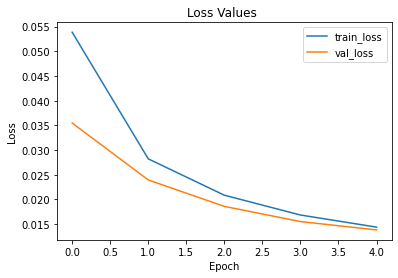

In [9]:
aut.history_plot(history5,5)

In [10]:
aut = Autoencoder()
history20,comp_autoencoder20 = aut.compression_autoencoder(x_train, x_val, 20)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0536 - acc: 0.0104 - val_loss: 0.0347 - val_acc: 0.0103
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0276 - acc: 0.0101 - val_loss: 0.0238 - val_acc: 0.0086
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0207 - acc: 0.0106 - val_loss: 0.0186 - val_acc: 0.0093
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0172 - acc: 0.0110 - val_loss: 0.0162 - val_acc: 0.0113
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0150 - acc: 0.0105 - val_loss: 0.0143 - val_acc: 0.0119
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0134 - acc: 0.0122 - val_loss: 0.0128 - val_acc: 0.0109
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0122 - acc: 0.0113 - val_loss: 0.0127 - val_acc: 0.0110
Epoch 8/20
375/375 [==============================] - 1s 4ms/step - loss: 0.

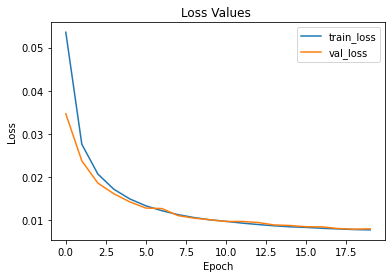

In [11]:
aut.history_plot(history20,20)

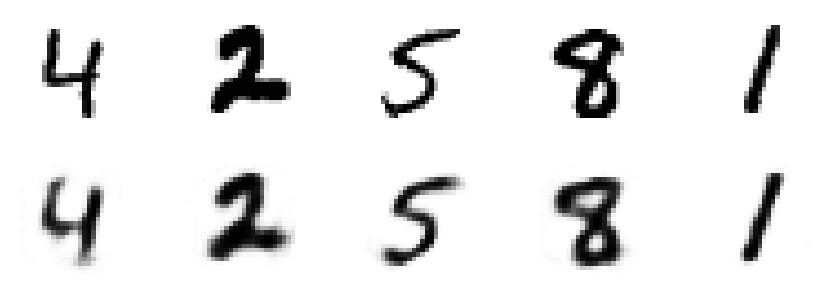

In [12]:
inputs = np.array(random.choices(x_test,k = 5))
decoded_img1 = comp_autoencoder5.predict(np.array(inputs))

input_img = inputs.reshape(inputs.shape[0],28,28)
decoded_img1 = decoded_img1.reshape(decoded_img1.shape[0],28,28)
aut.visualization(input_img,decoded_img1)


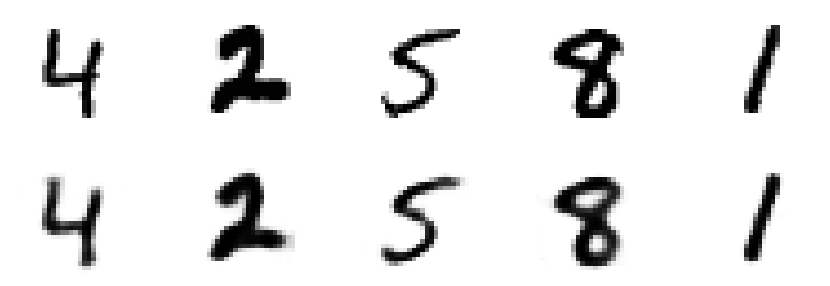

In [13]:
decoded_img2 = comp_autoencoder20.predict(np.array(inputs))
decoded_img2 = decoded_img2.reshape(decoded_img2.shape[0],28,28)
aut.visualization(input_img,decoded_img2)

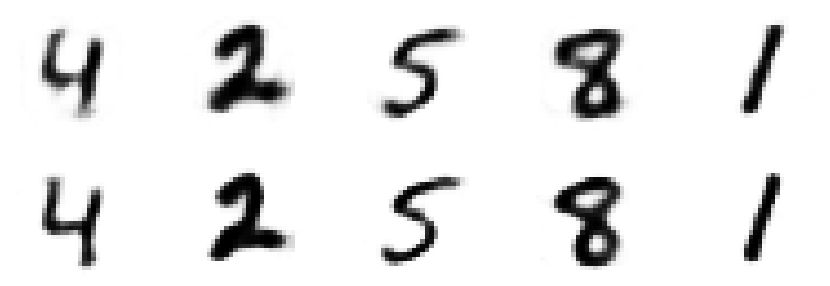

In [14]:
aut.visualization(decoded_img1,decoded_img2)
# 5 epoch training vs 20 epoch training 
# difference between reconstruction

### Denoising Autoencoders

#### Gaussian Noise

While noisy images were obtained, Gaussian Noise was added to the original images.
The mean and standard deviation values are used to add Gaussian Noise to images. The mean value is given as 0 and the standard deviation value is given as 0.2. This standard deviation value determines the amount of noise to be added to the image.

In [45]:
mean=0
std=0.2
noise_train = x_train + np.random.normal(mean, std, x_train.shape)
noise_val = x_val + np.random.normal(mean, std, x_val.shape)

In [46]:
input_img = np.array(random.choices(x_test,k = 5))
input_img =input_img.reshape(input_img.shape[0],28,28)
noise_img = input_img + np.random.normal(mean, std, input_img.shape)

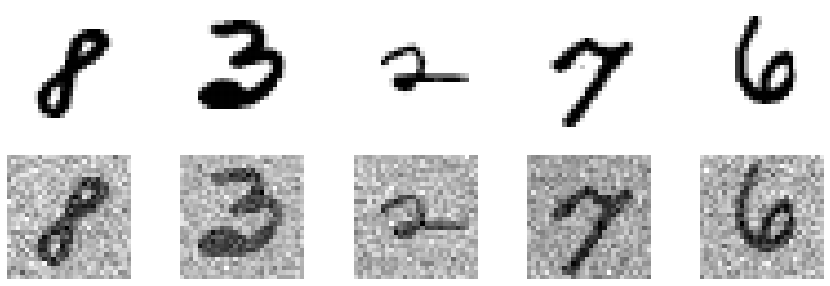

In [47]:
aut = Autoencoder()
aut.visualization(input_img,noise_img)

In [48]:
aut = Autoencoder()
history, denoising = aut.denoising_autoencoder(noise_train,noise_val, x_train, x_val, 20)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0562 - acc: 0.0107 - val_loss: 0.0383 - val_acc: 0.0117
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0305 - acc: 0.0103 - val_loss: 0.0263 - val_acc: 0.0106
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0234 - acc: 0.0108 - val_loss: 0.0216 - val_acc: 0.0126
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0195 - acc: 0.0119 - val_loss: 0.0189 - val_acc: 0.0111
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0172 - acc: 0.0124 - val_loss: 0.0170 - val_acc: 0.0121
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0158 - acc: 0.0111 - val_loss: 0.0158 - val_acc: 0.0142
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0148 - acc: 0.0115 - val_loss: 0.0151 - val_acc: 0.0141
Epoch 8/20
375/375 [==============================] - 1s 4ms/step - loss: 0.

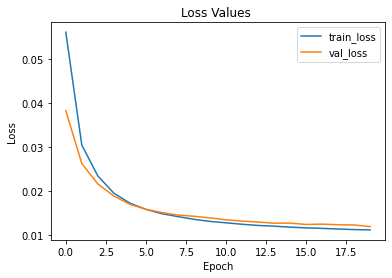

In [49]:
aut.history_plot(history,20)

In [50]:
decoded_img = denoising.predict(noise_img.reshape(5,784))

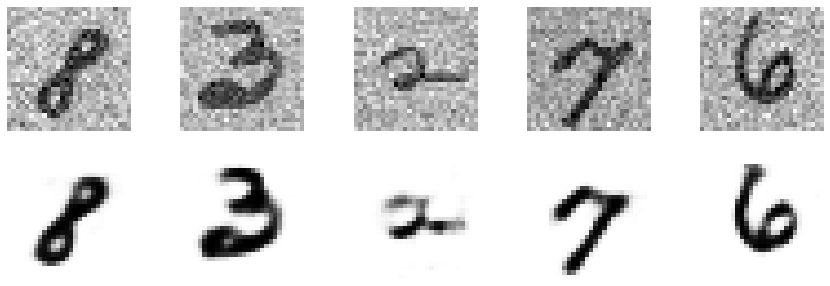

In [51]:
decoded_img =decoded_img.reshape(decoded_img.shape[0],28,28)
aut.visualization(noise_img,decoded_img)
# noisy images 

### Sparse Autoencoder

In [22]:
aut = Autoencoder()
history,sparse = aut.sparse_autoencoder(x_train, x_val, 20)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0691 - acc: 0.0098 - val_loss: 0.0678 - val_acc: 0.0136
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0676 - acc: 0.0093 - val_loss: 0.0677 - val_acc: 0.0093
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0675 - acc: 0.0110 - val_loss: 0.0667 - val_acc: 0.0155
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0602 - acc: 0.0117 - val_loss: 0.0560 - val_acc: 0.0058
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0522 - acc: 0.0101 - val_loss: 0.0470 - val_acc: 0.0079
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0413 - acc: 0.0082 - val_loss: 0.0376 - val_acc: 0.0103
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0339 - acc: 0.0119 - val_loss: 0.0313 - val_acc: 0.0100
Epoch 8/20
375/375 [==============================] - 1s 4ms/step - loss: 0.

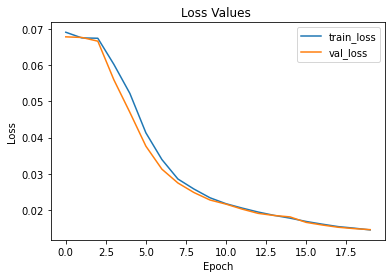

In [23]:
aut.history_plot(history,20)

In [24]:
input_img = np.array(random.choices(x_test,k = 5))
decoded_img = sparse.predict(np.array(input_img))

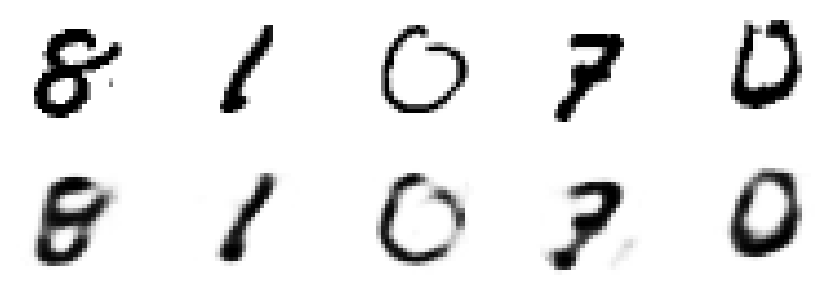

In [25]:
input_img =input_img.reshape(input_img.shape[0],28,28)
decoded_img =decoded_img.reshape(decoded_img.shape[0],28,28)

aut.visualization(input_img,decoded_img)

###  Variational Autoencoder

In [26]:
aut = Autoencoder()
history,vae = aut.variational_autoencoder(x_train, x_val, 20)

Epoch 1/20
375/375 [==============================] - 2s 7ms/step - loss: 165.4631 - val_loss: 134.0371
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 122.8547 - val_loss: 115.1434
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 111.3509 - val_loss: 108.9458
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 106.9138 - val_loss: 105.6853
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 104.1844 - val_loss: 103.3160
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 102.2069 - val_loss: 102.7818
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 100.6811 - val_loss: 101.1699
Epoch 8/20
375/375 [==============================] - 2s 5ms/step - loss: 99.5840 - val_loss: 99.8108
Epoch 9/20
375/375 [==============================] - 2s 5ms/step - loss: 98.7998 - val_loss: 99.3151
Epoch 10/20
375/375 [==============================] - 2s 5ms/step -

In [27]:
vae.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 128)          100480      input_5[0][0]                    
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 32)           4128        dense_16[0][0]                   
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 32)           4128        dense_16[0][0]                   
_______________________________________________________________________________________

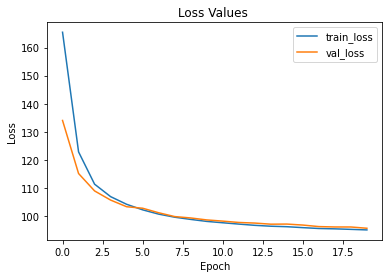

In [28]:
aut.history_plot(history,20)

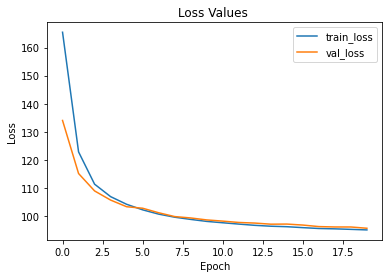

In [29]:
aut.history_plot(history,20)
inputs = np.array(random.choices(x_test,k = 5))
decoded_img = vae.predict(np.array(inputs))

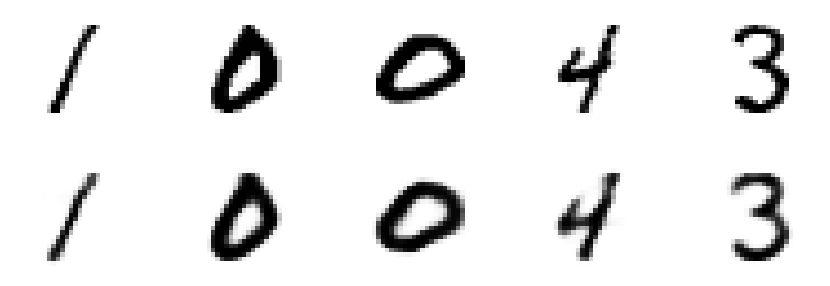

In [30]:
input_img = inputs.reshape(inputs.shape[0],28,28)
decoded_img = decoded_img.reshape(decoded_img.shape[0],28,28)
aut.visualization(input_img,decoded_img)